<a href="https://colab.research.google.com/github/sheelapravalika/sheela2000.drdo/blob/main/RandomForest_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U datasets huggingface_hub fsspec pandas scikit-learn matplotlib seaborn numpy

# ✅ STEP 2: Import Libraries
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [ ]:
# ✅ STEP 3: Load CIC-IDS2017 (Binary) Dataset
from datasets import load_dataset
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()
print(df)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
# ✅ STEP 4: Preprocess Data
#df.dropna(inplace=True)  # Drop missing rows
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Benign=0, Threat=1
X = df.drop('Label', axis=1)
y = df['Label']
print(X,y)
X_numeric = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
print(X_scaled)
print(y)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train faster model
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)


,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# ✅ STEP 7: Evaluate the Model
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9963333333333333

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4973
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00       304
           3       1.00      0.95      0.98        21
           4       1.00      0.99      1.00       425
           5       0.90      0.82      0.86        11
           6       1.00      0.88      0.93        16
           7       1.00      0.93      0.96        14
           8       1.00      0.99      0.99       216
           9       1.00      0.93      0.96        14
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2

    accuracy                           1.00      6000
   macro avg       0.74      0.71      0.72      6000
weighted avg       1.00      1.00      1.00      6000


📊 Confusion Matrix:
 [[4971    0    1    0    0    0    0    0    1    0  

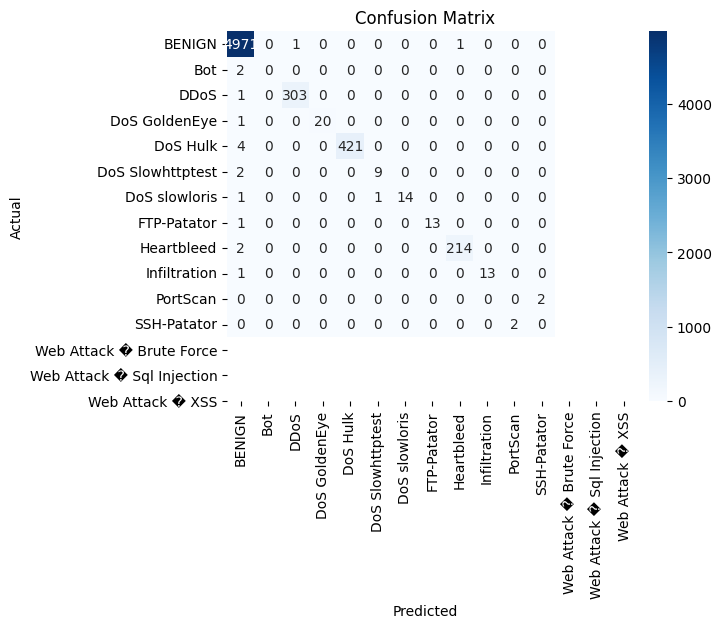

In [ ]:
# ✅ STEP 8: Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

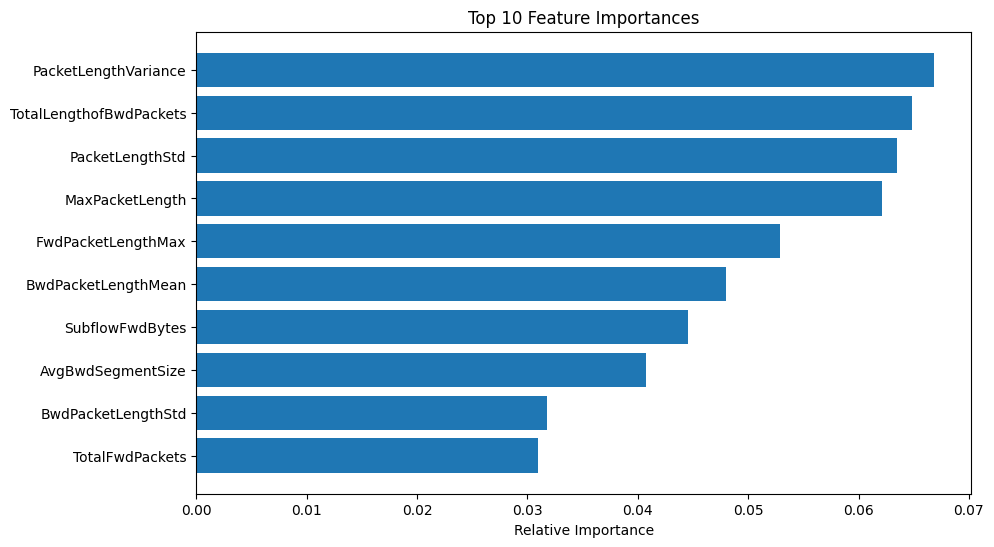

In [ ]:
# ✅ STEP 9: Feature Importancess
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
features = X.columns if isinstance(X, pd.DataFrame) else range(len(indices))

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import nbformat

# Step 1: Upload your broken notebook again
from google.colab import files
uploaded = files.upload()

# Replace this with the actual uploaded filename
filename = list(uploaded.keys())[0]

# Step 2: Load and clean
with open(filename, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# ✅ Step 3: Clean ONLY metadata.widgets (KEEP outputs and execution_count)
for cell in nb.cells:
    if 'metadata' in cell:
        cell['metadata'] = {k: v for k, v in cell['metadata'].items() if k != 'widgets'}

# ✅ Step 4: Clear notebook-level metadata.widgets (if present)
if 'widgets' in nb.get('metadata', {}):
    del nb['metadata']['widgets']

# Step 5: Save cleaned notebook
cleaned_filename = filename.replace('.ipynb', '_fixed.ipynb')
with open(cleaned_filename, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"✅ Cleaned notebook saved (outputs preserved) as {cleaned_filename}")
files.download(cleaned_filename)